In [1]:
import polars as pl
from matplotlib import pyplot as plt, set_loglevel

from src.common.paths import ModelPaths, PlotPaths
from src.plotting.plot_settings import (
    PLOT_WIDTH,
    PLOT_HEIGHT,
    LEGEND_FONT_SIZE,
    GRID_LINE_WIDTH,
    LABEL_FONT_SIZE,
    PLOT_LINE_OPTIONS,
)

set_loglevel("error")


In [2]:
data_path = ModelPaths.MODELS / "wandb_data_export"

loss_csv_name = "architecture_search_validation_loss.csv"
ssim_csv_name = "architecture_search_validation_ssim.csv"

target_plot_path = PlotPaths.PLOTS / "architecture_search"
target_plot_path.mkdir(exist_ok=True)

In [3]:
variation_to_display_name = {
    "pool_and_upsampling": "Variation 1",
    "upsample_64_64": "Variation 2",
    "more_depth": "Variation 3",
    "two_conv_layers_for_dimension_change": "Variation 4",
    "3_3_3": "Variation 5",
    "identity_mapping": "Variation 6",
    "identity_mappings_0_2_dropout": "Variation 7",
}

In [4]:
loss_data = pl.read_csv(data_path / loss_csv_name)
ssim_data = pl.read_csv(data_path / ssim_csv_name)

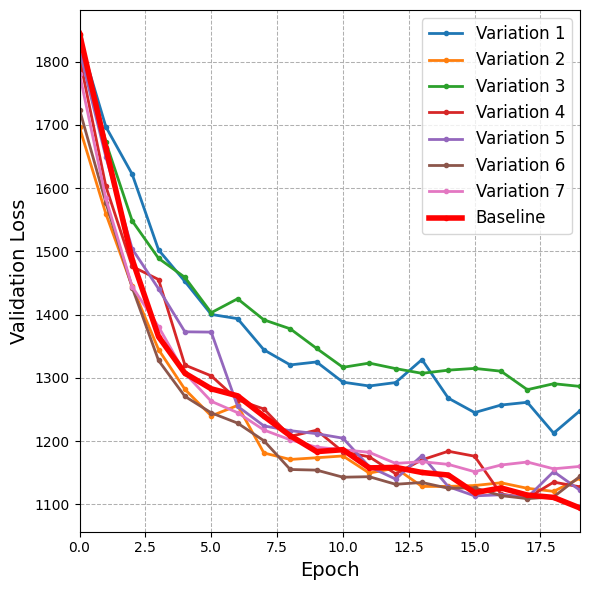

In [5]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

for variation, display_name in variation_to_display_name.items():
    data = loss_data[f"{variation} - val_loss"]
    ax.plot(loss_data["epoch"], data, label=display_name, linewidth=PLOT_LINE_OPTIONS["linewidth"], marker=".")

ax.plot(loss_data["epoch"], loss_data["baseline - val_loss"], label="Baseline", linewidth=2 * PLOT_LINE_OPTIONS["linewidth"], marker=".", color="red")

plt.xlim(loss_data["epoch"][0], loss_data["epoch"][-1])
plt.xlabel("Epoch", fontsize=LABEL_FONT_SIZE)
plt.ylabel("Validation Loss", fontsize=LABEL_FONT_SIZE)
plt.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
plt.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)

plt.tight_layout()
plt.savefig(target_plot_path / f"architecture_search_loss.eps", format="eps", bbox_inches="tight")

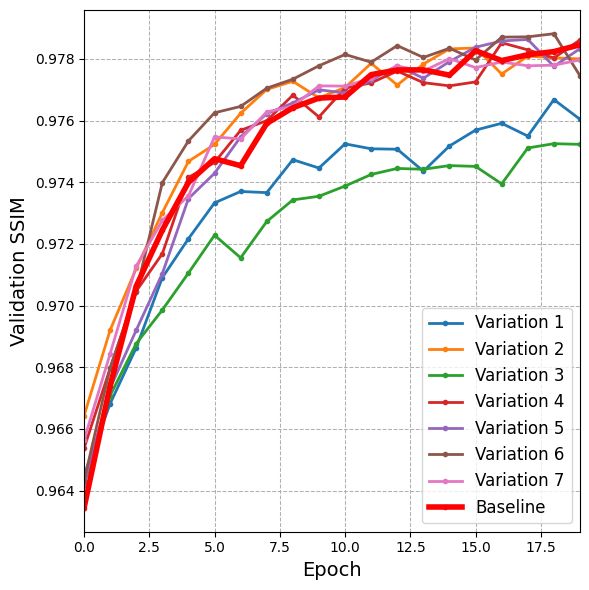

In [6]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

for variation, display_name in variation_to_display_name.items():
    data = ssim_data[f"{variation} - val_ssim"]
    ax.plot(ssim_data["epoch"], data, label=display_name, linewidth=PLOT_LINE_OPTIONS["linewidth"], marker=".")

ax.plot(ssim_data["epoch"], ssim_data["baseline - val_ssim"], label="Baseline", linewidth=2 * PLOT_LINE_OPTIONS["linewidth"], marker=".", color="red")

plt.xlim(ssim_data["epoch"][0], ssim_data["epoch"][-1])
plt.xlabel("Epoch", fontsize=LABEL_FONT_SIZE)
plt.ylabel("Validation SSIM", fontsize=LABEL_FONT_SIZE)
plt.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
plt.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)

plt.tight_layout()
plt.savefig(target_plot_path / f"architecture_search_ssim.eps", format="eps", bbox_inches="tight")